In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

In [2]:
df = pd.read_csv('../bballref_data/pca99_2000_to_2020.csv', index_col=0)
df.shape
df.head()

(6541, 37)

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_27,pc_28,pc_29,pc_30,pc_31,pc_32,pc_33,pc_34,pc_35,pc_36
player,,,,,,,,,,,,,,,,,,,,,
Tariq Abdul-Wahad 2000,1.624584,0.648571,-2.570328,-1.024536,-1.496393,-1.064360,-0.199212,-0.452909,0.627421,-0.307497,...,0.018246,0.613499,0.043577,-0.326777,-0.264193,-0.396446,-0.319992,0.467348,0.003882,0.763090
Shareef Abdur-Rahim 2000,3.077093,5.033589,-0.285658,-0.828242,-0.373176,-1.402322,-1.519070,0.919885,0.920035,1.748392,...,0.272083,-1.163421,-0.387644,-0.117222,-0.808379,0.343238,0.470530,-0.109593,-0.127918,0.531672
Ray Allen 2000,-1.902263,5.975791,1.106183,-1.134220,-0.573864,0.187800,-1.204524,0.193046,-0.565497,-0.004592,...,0.036907,-0.133836,0.436341,-0.318318,-0.663327,-0.181579,0.405751,-0.408679,0.143280,0.033482
John Amaechi 2000,3.146777,1.870816,-4.229900,-1.773928,-0.065892,-0.486662,-1.376912,-0.088055,-0.492940,1.016960,...,-0.315382,0.647813,-1.106444,-0.060919,0.117105,1.132256,0.287866,0.286607,0.596546,0.433832
Derek Anderson 2000,-1.699519,3.192662,-1.163751,-0.234027,0.147182,0.548495,-1.101432,-1.239357,0.227615,-0.049597,...,0.204437,0.397762,0.113927,-0.554796,-0.113935,-0.200834,-0.081152,0.065889,-0.292465,0.035639


In [3]:
df['pc_0'].sort_values()

player
Damon Jones 2008         -7.821757
Steve Kerr 2001          -7.454733
Jason Terry 2018         -7.388074
Dee Brown 2000           -7.298245
Steve Blake 2012         -7.208247
                           ...    
Dwight Howard 2010       10.789719
Shaquille O'Neal 2002    10.910634
Dwight Howard 2009       11.025087
Shaquille O'Neal 2005    11.233912
Shaquille O'Neal 2006    11.471732
Name: pc_0, Length: 6541, dtype: float64

## Determine number of clusters (AIC, BIC, Silouette Score)

Wall time: 2min 58s


Text(0.5, 0, 'Number components')

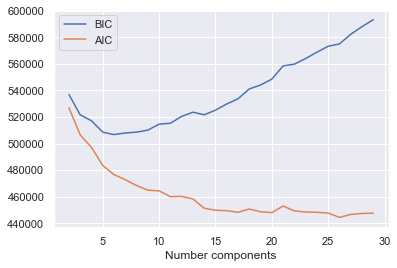

In [4]:
%%time

range_n_components = np.arange(2,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components')

Wall time: 25.2 s


C:\Users\alexk\anaconda3\envs\nba\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Silhouette Sore')

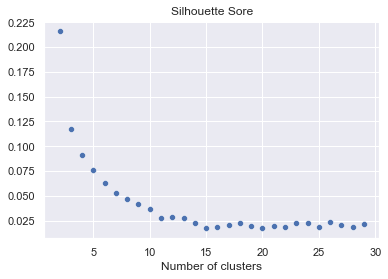

In [5]:
%%time
## Evaluate silhoutte score for each model
labels = {n: model.predict(df) for n, model in zip(range_n_components, models)}
silhoutte_scores = [silhouette_score(df, labels[n], random_state=seed) for n in range_n_components]
sns.scatterplot(range_n_components, silhoutte_scores)
plt.xlabel('Number of clusters')
plt.title('Silhouette Sore');

## Build GMM, cluster

In [ ]:
GaussianMixture?

In [11]:
%%time
n_comps = 12

gmm = GaussianMixture(n_components=n_comps, covariance_type='full', max_iter=10_000, n_init=10, random_state=seed)
gmm.fit(df)

hard_labels = gmm.predict(df)
soft_labels = gmm.predict_proba(df)
df_clusters = pd.DataFrame(hard_labels, index=df.index, columns=['label'])
soft_cols = [f'cluster_{n}' for n in range(gmm.n_components)]
df_clusters[soft_cols] = soft_labels
df_clusters = df_clusters.round(6)  ## for better visual
df_clusters.head()

Wall time: 42 s


,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
player,,,,,,,,,,,,,
Tariq Abdul-Wahad 2000,1,0.0,0.999994,0.000000,0.000006,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Shareef Abdur-Rahim 2000,1,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Ray Allen 2000,10,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000204,0.000000,0.0,0.999796,0.0
John Amaechi 2000,1,0.0,0.999972,0.000000,0.000000,0.0,0.0,0.000027,0.000000,0.000000,0.0,0.000000,0.0
Derek Anderson 2000,1,0.0,0.552898,0.000008,0.000003,0.0,0.0,0.000000,0.000000,0.447092,0.0,0.000000,0.0


In [12]:
# 12 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

8     1086
5      821
1      596
3      576
0      549
10     539
11     481
9      468
2      463
4      389
7      308
6      265
Name: label, dtype: int64

In [7]:
# 11 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

2     1203
3      990
1      708
10     677
8      621
0      588
4      559
6      485
7      321
9      228
5      161
Name: label, dtype: int64

In [16]:
## 10 clusters, n_init=8, max_iter=10000
df_clusters['label'].value_counts()

2    1079
4     834
6     808
1     743
3     702
5     602
8     591
9     546
0     356
7     280
Name: label, dtype: int64

In [21]:
## 14 clusters, n_init=8, max_iter=10000
df_clusters['label'].value_counts()

3     836
4     798
2     657
0     621
6     563
9     482
10    437
8     434
5     408
13    396
1     301
7     249
11    206
12    153
Name: label, dtype: int64

In [ ]:
## 8 clusters, n_init=5, max_iter=10000
df_clusters['label'].value_counts()

In [ ]:
## 12 clusters, n_init=10, max_iter=10000
df_clusters['label'].value_counts()

In [ ]:
## 11 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 10 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 12 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 11 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

### Look at clusters

In [13]:
## Sample each cluster

for n in range(0,gmm.n_components):
    print('label:', n, 'total:', len(df_clusters[df_clusters['label']==n]))
    print(df_clusters[df_clusters['label']==n].sample(20)[['label', f'cluster_{n}']])
    print('\n')

label: 0 total: 549
                        label  cluster_0
player                                  
Ryan Kelly 2015             0   0.998902
Joe Harris 2017             0   0.973499
Rasual Butler 2008          0   0.999956
Jason Kapono 2009           0   0.890163
Walter McCarty 2005         0   1.000000
Marko Jarić 2005            0   0.985892
Mike Miller 2015            0   1.000000
Wayne Ellington 2012        0   0.952335
Raja Bell 2003              0   0.945696
Pat Garrity 2006            0   0.999932
Matt Barnes 2016            0   0.652353
Peja Stojaković 2010        0   0.996976
Ryan Anderson 2018          0   1.000000
Patrick Patterson 2017      0   0.999998
Wesley Person 2005          0   1.000000
Francisco García 2006       0   0.567475
Danuel House 2019           0   0.999989
Luc Mbah a Moute 2016       0   0.997733
Paul Pierce 2016            0   0.999172
Trey Lyles 2017             0   0.431846


label: 1 total: 596
                              label  cluster_1
player   

In [14]:
## with n clusters = 18
players  = [
            'Chris Paul',
            'Steve Nash',
            'Tony Parker',
            'Jamal Crawford',
            'Lou Williams',
            'Goran Dragic'
            'Kobe Bryant',
            'LeBron James',
            'Paul Pierce',
            'Dirk',
            'Kobe',
            'Yao',
            'Chris Webber'
            "Shaquille O'Neal",
            'Dwight Howard',
            'Roy Hibbert',
            'Marcus Smart',
            'Jae Crowder'
            'Draymond Green',
            'Stephen Curry',
            'Klay Thompson',
            'Eddie House',
            'Peja',
            'Rashard Lewis'
            'Jameer Nelson',
            'Ray Allen',
            'Kevin Garnett',
            'Deandre Jordan',
            'Paul George',
            'James Harden',
            'Giannis',
            'Buddy Hield',
            'Kemba Walker',
            'Lamarcus',
            'Bradley Beal',
            'Russel Westbrook',
            'Kyrie Irving',
            'John Wall',
            'James Posey',
            'Hedo',
            'Gerald Green',
            'Ricky Davis',
            'Antoine Walker',
            'Duncan Robinson',
            'Rashard Lewis',
            'J.R. Smith',
            'Jae Crowder',
            'Robert Covington'
           ]
    
for player in players:
    print(df_clusters[df_clusters.index.str.contains(player)]['label'])

player
Chris Paul 2006    10
Chris Paul 2007    10
Chris Paul 2008    10
Chris Paul 2009    10
Chris Paul 2010     2
Chris Paul 2011    10
Chris Paul 2012    10
Chris Paul 2013    10
Chris Paul 2014    10
Chris Paul 2015    10
Chris Paul 2016    10
Chris Paul 2017    10
Chris Paul 2018    10
Chris Paul 2019    10
Chris Paul 2020    10
Name: label, dtype: int64
player
Steve Nash 2000    11
Steve Nash 2001    10
Steve Nash 2002    10
Steve Nash 2003    10
Steve Nash 2004    10
Steve Nash 2005    10
Steve Nash 2006    10
Steve Nash 2007    10
Steve Nash 2008    10
Steve Nash 2009    10
Steve Nash 2010    10
Steve Nash 2011    10
Steve Nash 2012    10
Steve Nash 2013    11
Name: label, dtype: int64
player
Tony Parker 2002    11
Tony Parker 2003    10
Tony Parker 2004    10
Tony Parker 2005    10
Tony Parker 2006    10
Tony Parker 2007    10
Tony Parker 2008    10
Tony Parker 2009    10
Tony Parker 2010     3
Tony Parker 2011    10
Tony Parker 2012    10
Tony Parker 2013    10
Tony Parker 2

In [15]:
df_multi_clusters = df_clusters[(df_clusters.iloc[:, 1:] < 0.9).all(axis=1)]
df_multi_clusters.shape
df_multi_clusters.head()

(612, 13)

,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11
player,,,,,,,,,,,,,
Derek Anderson 2000,1,0.0,0.552898,0.000008,0.000003,0.0,0.0,0.000000,0.0,0.447092,0.000000,0.000000,0.000000
Shandon Anderson 2000,8,0.0,0.000005,0.000008,0.000000,0.0,0.0,0.000000,0.0,0.838183,0.000041,0.161763,0.000000
Chris Anstey 2000,3,0.0,0.402284,0.000000,0.588362,0.0,0.0,0.009354,0.0,0.000000,0.000000,0.000000,0.000000
Tony Battie 2000,1,0.0,0.853354,0.000000,0.000001,0.0,0.0,0.146645,0.0,0.000000,0.000000,0.000000,0.000000
Mike Bibby 2000,10,0.0,0.000000,0.133315,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.559721,0.306964
